In [1]:
%run common.ipy

Using DW in /home/davo/Documents/GRASIA/daostack-notebooks/datawarehouse from date 2023-05-01T00:00:00


DW version 1.1.9


dao-analyzer version: 1.2.6
cache-scripts version: 1.1.9


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from IPython.display import display, HTML

import utils

def df_html(df: pd.DataFrame):
    dateCols = ['firstUser', 'firstActivity', 'lastActivity']
    outcols = ['name', 'register', 'nusers', 'cntActivity', *dateCols]
    
    for col in dateCols:
        df[col] = df[col].dt.strftime('%Y-%m-%d')
    
    return HTML(df[outcols].to_html(index=False))

## Datos agregados

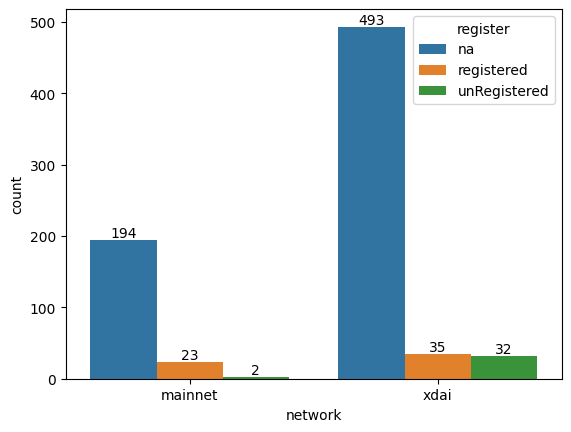

In [3]:
dfd = utils.get_df('dfd', registered_only=False).reset_index()

# Mostrar el número de DAOs en cada red
ax = sns.countplot(data=dfd.reset_index(), x='network', hue='register')
for c in ax.containers:
    ax.bar_label(c, label_type='edge');

### Descripción mainnet

In [4]:
dfd_mainnet = dfd[dfd['network'] == 'mainnet']
dfd_mainnet[dfd_mainnet['register'] == 'registered'].describe(datetime_is_numeric=True)

,nusers,hnusers,firstUser,firstActivity,lastActivity,lastVote,cntActivity,nvotes,nstakes,nproposals,...,TP,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid
count,23.000000,22.000000,22,22,22,21,23.000000,23.000000,23.000000,23.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,16.000000,22.000000,21.000000,22.000000,2.300000e+01
mean,273.695652,286.590909,2019-10-19 10:51:59.681818112,2019-11-16 02:32:56.090909184,2020-11-23 09:57:01.772727296,2020-11-12 04:51:09.857143040,491.565217,271.521739,132.826087,87.217391,...,66.181818,18.090909,1.818182,5.090909,0.835138,0.939881,0.802855,22.571429,20.045455,1.819236e+09
min,0.000000,2.000000,2019-04-08 08:48:39,2019-04-10 18:59:04,2019-08-05 10:50:06,2019-08-02 15:30:13,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.090909,0.800000,0.068966,1.000000,0.000000,1.942309e+08
25%,6.500000,8.500000,2019-06-30 18:48:14.750000128,2019-07-18 09:17:49.750000128,2020-02-01 19:49:56,2020-01-18 10:55:59,22.500000,7.500000,0.500000,8.500000,...,0.750000,2.250000,0.000000,0.000000,0.852509,0.879156,0.861888,3.000000,2.500000,9.110225e+08
50%,15.000000,21.500000,2019-10-07 21:55:05.500000,2019-10-21 03:41:05.500000,2020-09-06 17:49:00,2020-08-19 20:07:44,102.000000,48.000000,31.000000,30.000000,...,17.000000,8.500000,0.500000,0.000000,0.972275,0.966758,1.000000,8.000000,9.500000,1.628774e+09
75%,64.000000,69.250000,2019-12-18 20:53:38.750000128,2020-02-25 15:01:46.500000,2021-05-29 01:23:53.500000,2021-05-29 10:20:32,285.000000,134.500000,66.500000,52.500000,...,36.250000,15.750000,2.000000,1.750000,1.000000,1.000000,1.000000,24.000000,16.250000,2.286763e+09
max,4946.000000,4946.000000,2020-12-01 19:00:41,2020-12-23 10:03:06,2023-04-09 11:34:47,2023-04-09 11:34:47,4681.000000,2566.000000,1197.000000,918.000000,...,789.000000,118.000000,11.000000,54.000000,1.000000,1.000000,1.000000,134.000000,153.000000,4.180803e+09
std,1024.521238,1046.775669,NaN,NaN,NaN,NaN,1181.439754,674.113820,320.197333,198.076881,...,171.544979,31.406565,3.095871,12.447639,0.268718,0.068736,0.345693,37.617245,36.611834,1.206045e+09


In [5]:
dfd_mainnet[dfd_mainnet['register'] == 'na'].describe(datetime_is_numeric=True)

,nusers,hnusers,firstUser,firstActivity,lastActivity,lastVote,cntActivity,nvotes,nstakes,nproposals,...,TP,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid
count,194.000000,186.000000,186,38,38,32,194.000000,194.000000,194.000000,194.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,13.000000,35.000000,32.000000,38.000000,1.940000e+02
mean,3.335052,3.500000,2020-12-29 10:58:40.704301056,2020-04-21 10:02:00.815789568,2020-06-13 14:28:38.815789312,2020-06-19 00:30:16.750000128,2.943299,1.376289,0.530928,1.036082,...,1.947368,1.289474,0.184211,1.868421,0.553660,0.903846,0.466367,2.468750,2.026316,2.096079e+09
min,0.000000,1.000000,2019-07-23 22:12:34,2019-11-05 19:37:56,2019-11-05 19:37:56,2019-11-25 17:14:55,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,0.000000,6.326230e+06
25%,1.000000,1.000000,2020-02-23 10:04:46,2020-01-04 21:43:18,2020-01-28 06:32:18,2020-02-02 18:03:26.249999872,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.875000,0.000000,1.000000,1.000000,9.773229e+08
50%,2.000000,2.000000,2020-05-23 05:43:49,2020-03-16 22:28:17,2020-04-23 16:56:01.500000,2020-05-02 05:38:59.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.625000,1.000000,0.500000,2.000000,1.000000,2.256508e+09
75%,4.000000,4.000000,2021-07-26 12:55:24.750000128,2020-05-20 23:31:46.500000,2020-07-09 16:16:17.750000128,2020-07-11 23:17:29.500000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.130836e+09
max,28.000000,28.000000,2022-08-25 00:40:18,2022-08-25 01:05:39,2022-08-25 01:15:35,2022-08-25 01:15:35,100.000000,51.000000,23.000000,35.000000,...,17.000000,6.000000,3.000000,21.000000,1.000000,1.000000,1.000000,10.000000,11.000000,4.290604e+09
std,4.709830,4.787653,NaN,NaN,NaN,NaN,11.116989,5.509074,2.454049,3.658157,...,3.910812,1.575280,0.608732,3.595576,0.411239,0.197191,0.435033,2.015814,2.174631,1.239098e+09


Parece que se está usando, porque existe una DAO "nueva" (first user la semana pasada), y además hay alguna con un pctActive del 50%.

### Descripción xdai

In [6]:
dfd_xdai = dfd[dfd['network'] == 'xdai']
dfd_xdai[dfd_xdai.register == 'registered'].describe(datetime_is_numeric=True)

,nusers,hnusers,firstUser,firstActivity,lastActivity,lastVote,cntActivity,nvotes,nstakes,nproposals,...,TP,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid
count,35.000000,35.000000,35,34,34,34,35.000000,35.00000,35.000000,35.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,1.000000,34.000000,34.000000,34.000000,3.500000e+01
mean,91.600000,94.485714,2020-02-27 04:24:56.571428608,2020-02-29 07:56:21.176470528,2020-05-12 10:02:58.529411840,2020-04-05 18:33:40,275.514286,173.80000,57.000000,44.714286,...,38.852941,3.352941,0.529412,3.294118,0.194792,0.986557,0.189904,4.352941,3.235294,2.150576e+09
min,1.000000,1.000000,2020-02-06 09:04:30,2020-02-06 18:29:00,2020-02-13 19:48:55,2020-02-13 19:48:55,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.986557,0.000000,1.000000,0.000000,3.471243e+08
25%,1.000000,1.000000,2020-02-10 18:45:42.500000,2020-02-11 10:56:17.500000,2020-02-15 03:30:00,2020-02-15 01:50:51.249999872,3.000000,1.50000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.986557,0.000000,1.000000,0.000000,1.144078e+09
50%,2.000000,2.000000,2020-02-12 21:09:10,2020-02-13 15:40:17.500000,2020-02-15 23:30:40,2020-02-15 18:06:52.500000,6.000000,3.00000,0.000000,3.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.986557,0.000000,1.000000,0.000000,2.083938e+09
75%,3.000000,3.000000,2020-02-13 06:21:15,2020-02-13 18:23:02.500000,2020-02-16 19:39:01.249999872,2020-02-16 00:23:25,13.000000,7.00000,0.000000,4.000000,...,0.000000,1.000000,0.000000,3.750000,0.333333,0.986557,0.333333,2.000000,0.750000,3.179813e+09
max,2730.000000,2830.000000,2020-11-17 08:45:40,2020-11-23 17:44:25,2023-04-07 19:41:05,2023-04-07 19:41:05,9342.000000,5913.00000,1991.000000,1438.000000,...,1321.000000,80.000000,18.000000,19.000000,0.974270,0.986557,0.846154,92.000000,97.000000,4.249488e+09
std,464.007302,480.756229,NaN,NaN,NaN,NaN,1577.616564,998.64702,336.520867,242.470080,...,226.549631,13.717678,3.086975,3.965987,0.267090,NaN,0.253572,15.513205,16.595105,1.216534e+09


In [7]:
dfd_xdai[dfd_xdai['register'] == 'unRegistered'].describe(datetime_is_numeric=True)

,nusers,hnusers,firstUser,firstActivity,lastActivity,lastVote,cntActivity,nvotes,nstakes,nproposals,...,TP,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid
count,32.000000,32.000000,32,9,9,7,32.000000,32.000000,32.0,32.000000,...,9.0,9.000000,9.0,9.000000,9.000000,0.0,9.000000,7.000000,9.000000,3.200000e+01
mean,2.593750,2.593750,2020-02-06 19:39:21.875000320,2020-02-10 10:13:41.111111168,2020-02-16 14:13:26.666666752,2020-02-18 07:49:00,1.937500,0.843750,0.0,1.093750,...,0.0,1.555556,0.0,2.333333,0.449383,NaN,0.449383,1.571429,0.555556,2.410732e+09
min,1.000000,1.000000,2020-01-14 11:43:15,2020-01-14 18:58:40,2020-02-05 00:45:30,2020-02-05 00:45:30,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.509397e+08
25%,1.000000,1.000000,2020-02-05 18:24:37.500000,2020-02-11 10:16:55,2020-02-14 21:37:45,2020-02-15 01:23:22.500000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.502309e+09
50%,1.000000,1.000000,2020-02-06 01:51:47.500000,2020-02-12 03:49:50,2020-02-15 01:42:15,2020-02-15 18:56:10,0.000000,0.000000,0.0,0.000000,...,0.0,1.000000,0.0,1.000000,0.444444,NaN,0.444444,1.000000,0.000000,2.490714e+09
75%,4.000000,4.000000,2020-02-10 18:54:47.500000,2020-02-13 18:13:10,2020-02-15 23:23:25,2020-02-15 22:26:07.500000,2.250000,0.000000,0.0,1.250000,...,0.0,2.000000,0.0,3.000000,1.000000,NaN,1.000000,2.000000,1.000000,3.303490e+09
max,11.000000,11.000000,2020-02-12 21:17:10,2020-02-27 08:54:45,2020-03-16 11:22:20,2020-03-16 11:22:20,19.000000,9.000000,0.0,10.000000,...,0.0,4.000000,0.0,9.000000,1.000000,NaN,1.000000,3.000000,3.000000,4.220520e+09
std,2.298097,2.298097,NaN,NaN,NaN,NaN,4.354734,2.001763,0.0,2.441039,...,0.0,1.589899,0.0,3.000000,0.452773,NaN,0.452773,0.786796,1.013794,1.164796e+09


In [8]:
dfd_xdai[dfd_xdai['register'] == 'na'].describe(datetime_is_numeric=True)

,nusers,hnusers,firstUser,firstActivity,lastActivity,lastVote,cntActivity,nvotes,nstakes,nproposals,...,TP,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid
count,493.000000,493.000000,493,140,140,115,493.000000,493.000000,493.000000,493.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,5.000000,140.000000,115.000000,140.000000,4.930000e+02
mean,8.257606,8.275862,2021-08-23 11:41:27.762677504,2021-08-20 17:40:55.742856960,2021-09-05 09:51:43.642857216,2021-09-16 03:32:33.521739264,17.592292,12.446247,2.158215,2.987830,...,5.314286,1.414286,0.157143,3.635714,0.297332,0.982957,0.290696,2.400000,1.721429,2.095423e+09
min,1.000000,1.000000,2020-03-23 12:42:35,2020-04-16 15:02:00,2020-05-25 16:26:40,2020-05-11 18:57:55,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.944444,0.000000,1.000000,0.000000,1.228324e+07
25%,1.000000,1.000000,2021-05-02 06:01:40,2021-05-31 23:07:30,2021-06-03 07:56:22.500000,2021-06-04 00:28:30,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.970339,0.000000,1.000000,1.000000,1.140177e+09
50%,2.000000,2.000000,2021-10-23 03:50:00,2021-10-15 06:28:15,2021-10-20 14:37:25,2021-10-22 05:26:10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.047753e+09
75%,3.000000,3.000000,2021-12-17 00:51:55,2021-12-18 01:03:15,2021-12-27 04:48:53.750000128,2022-01-03 13:12:20,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.787359,1.000000,0.762500,2.000000,1.000000,3.142461e+09
max,305.000000,305.000000,2022-09-29 00:33:25,2022-08-29 04:33:15,2022-08-29 06:30:55,2022-08-29 06:30:55,7345.000000,5404.000000,968.000000,973.000000,...,687.000000,75.000000,21.000000,190.000000,1.000000,1.000000,1.000000,56.000000,84.000000,4.294097e+09
std,37.222204,37.261559,NaN,NaN,NaN,NaN,331.060181,243.514193,43.644714,44.042107,...,58.077607,6.543695,1.776228,16.906519,0.427368,0.025069,0.424888,5.526332,7.081304,1.211348e+09


En xdai, las daos unRegistered parecen ser DAOs muertas.

Las DAOs "na" sí que estan vivas, con actividad bien reciente, y alguna DAO con un pctActive del 0.60

## Mostrar daos unRegistered

In [9]:
dfd[(dfd['network'] == 'mainnet') & (dfd['register'] == 'unRegistered')] # []

,network,dao,id,name,register,nativeToken,nativeReputation,nusers,hnusers,firstUser,...,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid,group
167,mainnet,0xbe1a98d3452f6da6e0984589e545d4fc25af7526,0xbe1a98d3452f6da6e0984589e545d4fc25af7526,dOrg,unRegistered,0xa2952b15d34d40c9bcd6596a06f9cbb0561236f0,0xe0a46b46b9f283285b2461b73ebb027eef39883d,21,25.0,2019-05-10 01:45:49,...,45.0,2.0,246.0,0.217666,0.923077,0.154639,19.0,15.0,3189414099,dOrg
191,mainnet,0xd358d4f159e6fae32d1b6096bdace829a5fe33fb,0xd358d4f159e6fae32d1b6096bdace829a5fe33fb,dOrg,unRegistered,0xf3cf5bddbf4cb8dccdce776bbb217432c617a314,0x7e4230d68ea22730ec1ae13173c333c452424e58,21,22.0,2020-02-12 20:38:05,...,5.0,0.0,37.0,0.159091,1.000000,0.119048,10.0,5.0,3545814257,dOrg


In [10]:
dfd[(dfd['network'] == 'xdai') & (dfd['register'] == 'unRegistered') & (dfd['cntActivity'] > 1)]

,network,dao,id,name,register,nativeToken,nativeReputation,nusers,hnusers,firstUser,...,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid,group
305,xdai,0x283237cab711e9c236b7b3a76f6b23486141ea82,0x283237cab711e9c236b7b3a76f6b23486141ea82,NEAR DevDAO,unRegistered,0x9dd7fa224dbb96cf42628516f2755e9a184044ca,0x952125e94c5b2c9ca0cddc757bc3742ba56bbbb2,1,1.0,2020-02-10 18:57:45,...,0.0,0.0,3.0,0.000000,NaN,0.000000,1.0,0.0,674379722,NEAR DevDAO
367,xdai,0x471a6ac623941a337732b4ed7b1a2529de78d394,0x471a6ac623941a337732b4ed7b1a2529de78d394,Cosmos Ethermint DAO,unRegistered,0x2eaa3ea2c26ef18cb35f4eb0cb7782bed02073cd,0x1c174d1bad3c9d2b7962202988f26768b26fba39,1,1.0,2020-02-12 20:54:40,...,2.0,0.0,0.0,1.000000,NaN,1.000000,NaN,0.0,1192913606,Cosmos Ethermint DAO
372,xdai,0x4875e1045af3c72d4c8b6266744b9bdabbf38d6d,0x4875e1045af3c72d4c8b6266744b9bdabbf38d6d,xDAItestDAO,unRegistered,0x8d88d2bc35eedbffda7e4da5fdadaaa11468e21b,0xe8e1842a48435d8940508acabb7231d39dd7e2ed,3,3.0,2020-02-10 19:01:50,...,4.0,0.0,5.0,0.444444,NaN,0.444444,2.0,3.0,1215684868,xDAItestDAO
406,xdai,0x5721b7851509030d471a8507a2f31a2d7ce481d9,0x5721b7851509030d471a8507a2f31a2d7ce481d9,tBTC DAO,unRegistered,0xd9420de6fdfcb7ed1d739d7a09d96e7750486249,0x6f100ffa117e1588390d74f9cab2e63dd3d5b135,2,2.0,2020-02-12 21:17:10,...,0.0,0.0,1.0,0.000000,NaN,0.000000,2.0,0.0,1461827461,tBTC DAO
566,xdai,0x95bf39cfbc8aa2dab5c6ec436985406bfc5b3513,0x95bf39cfbc8aa2dab5c6ec436985406bfc5b3513,BuffiDAO,unRegistered,0x06c5aa441d33c39c28749223ada0e7d91bd84210,0x5ca68590066d22523050f1fa3bdfa815d2d556e5,1,1.0,2020-02-04 15:52:10,...,2.0,0.0,0.0,1.000000,NaN,1.000000,1.0,1.0,2512337359,BuffiDAO
570,xdai,0x9789cbc6099f1a0591cf15bbd44cd2d05ea37e08,0x9789cbc6099f1a0591cf15bbd44cd2d05ea37e08,BuffiBountyDAO,unRegistered,0xee235e3b952654c178d8b70a09d5952db8773b56,0x787af2f2923419e78ea32425c9720428f46eee02,1,1.0,2020-02-10 18:45:20,...,1.0,0.0,9.0,0.100000,NaN,0.100000,1.0,1.0,2542390214,BuffiBountyDAO
613,xdai,0xafa82df1cd041d93655d474062e42929471ea69a,0xafa82df1cd041d93655d474062e42929471ea69a,Pepo UX Awards DAO,unRegistered,0x4f41f53ce5914ffc81198514fb70c18651eab284,0xa71323ee0a5aa031f00d87e6577f3541be765292,4,4.0,2020-02-10 18:59:25,...,1.0,0.0,1.0,0.500000,NaN,0.500000,3.0,0.0,2947034609,Pepo UX Awards DAO
708,xdai,0xdd8ebe1eb370c2dc2f2e7d136be8d35986a5f5e1,0xdd8ebe1eb370c2dc2f2e7d136be8d35986a5f5e1,SKALE DAO,unRegistered,0xf469775b4310cb0065086a0923d97d59d571cb54,0xdd61ed36a80826d2f7e1699487763f27fd3674d1,1,1.0,2020-02-12 20:50:15,...,0.0,0.0,2.0,0.000000,NaN,0.000000,1.0,0.0,3717119518,SKALE DAO
763,xdai,0xfa19f292b400579794e2e3cc0d4b6559482b9d94,0xfa19f292b400579794e2e3cc0d4b6559482b9d94,Spasmodic Salad,unRegistered,0x7b0ca26686991ee5fc4d773adc360dab1911a489,0x0b165d1c38c77a96f08682b90773d591f976c40c,6,6.0,2020-01-14 11:43:15,...,4.0,0.0,0.0,1.000000,NaN,1.000000,NaN,0.0,4196004498,Spasmodic Salad


## Mostrar DAOs register=na

In [11]:
dfd[(dfd['network'] == 'mainnet') & (dfd['register'] == 'na') & (dfd['cntActivity'] > 1)].sort_values('cntActivity')

,network,dao,id,name,register,nativeToken,nativeReputation,nusers,hnusers,firstUser,...,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid,group
0,mainnet,0x006087d6ac20840c23ba298512db454a05c19b10,0x006087d6ac20840c23ba298512db454a05c19b10,FitTogether,na,0xa3820e0f6be1c306c0a76746af80b60c228d99c2,0x63853face2fa44c4e7a8b4cf2371416c5af8e68b,2,2.0,2020-04-27 07:04:20,...,2.0,0.0,0.0,1.000000,NaN,1.000000,NaN,0.0,6326230,FitTogether
129,mainnet,0x98b5b7d09559bac9a98f967176efe19a439f56e2,0x98b5b7d09559bac9a98f967176efe19a439f56e2,CryptoChicks,na,0x051d0d7a0f5b2b872f71e9fe3191535087288494,0x6f8765d41c788b1b901e845f4440eb8de3a31b1b,1,1.0,2020-03-03 15:01:05,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,2562045904,CryptoChicks
123,mainnet,0x9272311f7b79700a7d115b9e48bd5f29640ead3b,0x9272311f7b79700a7d115b9e48bd5f29640ead3b,Cluster DAO,na,0xbfc2b1e94322e9b6e9fad03b609f78042ad2e398,0x22771cf0150b7b4e91ac87e025f6420cbbeabba3,1,1.0,2020-07-22 19:39:14,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,2456957215,Cluster DAO
118,mainnet,0x90144897dd5ef204cec986e5499980e42589ea64,0x90144897dd5ef204cec986e5499980e42589ea64,bancor test dao,na,0xb6e2b316b1329a5ac9d10a6556ff080d1cb98ec6,0xb26081c5620322384793f4b9e84c6f10b8d23117,1,1.0,2020-03-23 20:32:46,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,2417248407,bancor test dao
57,mainnet,0x3d4b13c3cb3a68cf8fd45b9a05ae7a75379f291f,0x3d4b13c3cb3a68cf8fd45b9a05ae7a75379f291f,The Griffen DAO,na,0x7c2577ee68a4e5096303492a3f168a2323d2199f,0xb3e2f7b0d5278bfab7119bd8a2437fe0cec570d0,3,3.0,2021-04-27 05:10:49,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,1028330435,The Griffen DAO
112,mainnet,0x86360ffb872b80e7a5960b7a30f68fcf723baf15,0x86360ffb872b80e7a5960b7a30f68fcf723baf15,Test DAO,na,0xbd7989d643dfa5f98f7799d60874641ef0a350ed,0x4264d7d24f5c8fb9e13c24cd9d9179c9ec744e21,2,2.0,2020-02-13 22:47:30,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,2251689979,Test DAO
95,mainnet,0x6cbebca5fbbda2a1c59cbd0e3dd33f032f363ad1,0x6cbebca5fbbda2a1c59cbd0e3dd33f032f363ad1,$WHALE DAO,na,0xb6ecef43b9bbf7bc3f5bf62d44668163a7dfc782,0x54421b6dfefed3522d05ccd688764eba447a9e4c,1,1.0,2020-08-21 06:10:05,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,1824439461,$WHALE DAO
86,mainnet,0x6441222fadb2fe1ccefcd588122acd9176db5ef6,0x6441222fadb2fe1ccefcd588122acd9176db5ef6,XY Digital Data,na,0xc03c5df281222a766421d8c33ce7aa8af457d3ef,0x3e245bfdc2aaeafa0540577c3b308a4141e44be5,1,1.0,2022-08-25 00:34:25,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,1681990191,XY Digital Data
196,mainnet,0xdc91dddc3027b1b69cd9a583ac6625577b942ff1,0xdc91dddc3027b1b69cd9a583ac6625577b942ff1,dOrg,na,0x6ab3a6aad11998a2849963658c3ad6a811600d4c,0x40f9245b19efdf00df2aeca64c3ebb79ea647a53,21,22.0,2020-02-12 00:33:04,...,0.0,0.0,0.0,1.000000,1.000000,NaN,1.0,1.0,3700547036,dOrg
192,mainnet,0xd4501c90b743721efe9221a303a679def04ff7de,0xd4501c90b743721efe9221a303a679def04ff7de,ArchchainDAO,na,0x936a41b56222d742f9bdc0f83ebb879e5b41bf43,0xd4fba1370ac4d11a8857aec20373d34c826ec32f,11,11.0,2019-12-17 18:02:51,...,1.0,0.0,0.0,1.000000,NaN,1.000000,2.0,0.0,3562019984,ArchchainDAO


In [12]:
dfd[(dfd['network'] == 'xdai') & (dfd['register'] == 'na') & (dfd['cntActivity'] > 1)].sort_values('nproposals')

,network,dao,id,name,register,nativeToken,nativeReputation,nusers,hnusers,firstUser,...,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid,group
227,xdai,0x049a99f46f01d4dfac72639560e774ce274a1676,0x049a99f46f01d4dfac72639560e774ce274a1676,Metaverse Startup Studio,na,0x8b9f58ab295106a42f4019e7c3d291631a0d784d,0xac1529ee03d17bda97c87920ac406e79322c5b75,1,1.0,2021-10-09 19:09:15,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,77240820,Metaverse Startup Studio
579,xdai,0x9b245107a70003279f59aea0af03ce2e378a9fd7,0x9b245107a70003279f59aea0af03ce2e378a9fd7,Puff Dragon,na,0x35d9e923de2093ba114299217b5e4cdbd011b2d7,0xa39c36bd76b24b02b6f4d0c95e3cef7bfd6575ad,2,2.0,2021-10-20 13:30:05,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,2602848519,Puff Dragon
559,xdai,0x94489d369727079f86a552152f1580847d2ac59b,0x94489d369727079f86a552152f1580847d2ac59b,Paul's DAO,na,0x26cd75a727258068eb403a0a1d167c240385ef5c,0x14a12081777828c7393987fc7792cf16ea1474fd,3,3.0,2021-09-09 23:43:10,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,1.0,2487786806,Paul's DAO
558,xdai,0x944336ed635e110d39a461b5f3b21e91362a0a40,0x944336ed635e110d39a461b5f3b21e91362a0a40,Kanamit,na,0xe75534bf9bea42454c88a163f7f93079cb706a44,0x0a21849e0eb6534bc48e3c18a216341174376901,6,6.0,2021-06-11 12:17:50,...,0.0,0.0,1.0,0.000000,NaN,0.000000,3.0,0.0,2487432941,Kanamit
543,xdai,0x8d9b48937bf75f483ba6569f0450a63b12ea05be,0x8d9b48937bf75f483ba6569f0450a63b12ea05be,Trusty,na,0xe28eda0413221f03d080e53628f699e5ce7f8e44,0x71ab61a616b6abc9780f0def6545e93ffaa3d480,2,2.0,2021-11-28 22:23:50,...,0.0,0.0,1.0,0.000000,NaN,0.000000,2.0,1.0,2375764115,Trusty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,xdai,0xfff2b9bb869c7886a07c3105c7ed75fa48c4ff75,0xfff2b9bb869c7886a07c3105c7ed75fa48c4ff75,DAOrecords,na,0x7ba277f18bb89e8a5dba53971bc3cea510ce5d58,0x50db7f0b5461bf577e564424bc02f0d0c55e3cc7,6,6.0,2020-06-04 02:17:55,...,11.0,1.0,0.0,0.965517,0.944444,1.000000,1.0,3.0,4294097339,DAOrecords
587,xdai,0x9fd9329a025fadf8602207200ff4db40558136b5,0x9fd9329a025fadf8602207200ff4db40558136b5,Digital Ventures,na,0x1d62d862afe7aa2a70394ed59751d424722c3ed9,0x206706b83697dac5ea080d2d2accf9a92ddee419,11,11.0,2021-12-09 03:59:35,...,8.0,0.0,23.0,0.258065,NaN,0.258065,1.0,1.0,2681811610,Digital Ventures
420,xdai,0x5d7ce699df28e073d06380c51897b4cce2fe263c,0x5d7ce699df28e073d06380c51897b4cce2fe263c,Rarible Protocol Working Group,na,0x2fa28445e5c84c4e0eca7367d6a6ab794111116c,0xad7287f55b710af0f3170ad5dafd0fc2dd8b4e2d,32,32.0,2021-07-27 00:13:45,...,5.0,0.0,12.0,0.636364,1.000000,0.294118,18.0,9.0,1568466585,Rarible Protocol Working Group
624,xdai,0xb5baec292bc025847d4525ea2146a7f991b718c8,0xb5baec292bc025847d4525ea2146a7f991b718c8,_Prtcl Executive v0,na,0x9c54743383261ce6a34b71b7aaa73d54e86241ff,0xdf27670682d25937b543916f3debbd3942312f97,9,9.0,2020-12-03 16:19:15,...,12.0,0.0,58.0,0.292683,1.000000,0.171429,5.0,6.0,3048926249,_Prtcl Executive v0


In [13]:
dfd[(dfd['network'] == 'xdai') & (dfd['register'] == 'registered') & (dfd['cntActivity'] > 1)].sort_values('nproposals')

,network,dao,id,name,register,nativeToken,nativeReputation,nusers,hnusers,firstUser,...,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid,group
772,xdai,0xfd4a08ba1863718d92467ad05f13b352c3ae2cfd,0xfd4a08ba1863718d92467ad05f13b352c3ae2cfd,Arbitrum DAO,registered,0x20fb26fe1b17711521f73df4b7922009c8d5d2cc,0x9617279096a667ca9f0aabc8a97d33b84481f6b7,1,1.0,2020-02-10 18:44:10,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,0.0,4249487546,Arbitrum DAO
741,xdai,0xeed417f80cd918ce65b8e141daa00704aef98a90,0xeed417f80cd918ce65b8e141daa00704aef98a90,Gitcoin: Shillin and Chillin DAO,registered,0x77c0e789654711a7f45ac9180227e507e6cca97c,0x1c6b461f2d295630046a5a13c4c7ab9b6c7b58ca,1,1.0,2020-02-12 21:10:20,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,0.0,4006877176,Gitcoin: Shillin and Chillin DAO
295,xdai,0x24ea2983e3c53ddd873e4d07a3fe7f523e597910,0x24ea2983e3c53ddd873e4d07a3fe7f523e597910,PegaSysDAO,registered,0xba78832542d68a66ef100b9be696523b70fa6a44,0x556534c7812667eac22bafc431469f3d25f680fc,1,1.0,2020-02-12 21:13:20,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,0.0,619325827,PegaSysDAO
318,xdai,0x2cec92ed4d1a110032a4a7e5e2abf64938cf1455,0x2cec92ed4d1a110032a4a7e5e2abf64938cf1455,Bancor DAO,registered,0xa67c9a9d46fa2380b7d5728a4ee5b8c8b5462605,0xaea77779ee80967519b91e0ffc923a3a684fe904,1,1.0,2020-02-12 21:06:30,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,0.0,753701613,Bancor DAO
319,xdai,0x2e9d79165ddb22e67742789cc553e95722f96f0b,0x2e9d79165ddb22e67742789cc553e95722f96f0b,Shapeshift DAO,registered,0x306d3735e1acfb47113829e6b78cd566e88c3d50,0x6868dda8b19c7f4b5dd6791d622a2c37aace88ae,3,3.0,2020-02-12 20:48:55,...,0.0,0.0,1.0,0.000000,NaN,0.000000,2.0,0.0,782072086,Shapeshift DAO
653,xdai,0xc09ae92f62d0484ea68151eb2c9d50f71ec475ff,0xc09ae92f62d0484ea68151eb2c9d50f71ec475ff,Fortmatic DAO,registered,0x271a522bd429e198ba67da6b30408dbfb875e362,0x33dcec8a2c24779cd4a395788072ae24d209c714,1,1.0,2020-02-15 16:35:35,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,0.0,3231377711,Fortmatic DAO
632,xdai,0xba754aed4afb3cd2e7a865913cea619bd51bd65b,0xba754aed4afb3cd2e7a865913cea619bd51bd65b,MythX DAO,registered,0xf0ce7cbd31f7bd7775a318de42db6da09f7f1b5a,0xedd1d08f225abb364d9e2ede239077bdbdd6cc1f,1,1.0,2020-02-12 21:14:45,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,0.0,3128249069,MythX DAO
374,xdai,0x4ad0b1e6320c365ddcee20018e6608b0ad0d35b5,0x4ad0b1e6320c365ddcee20018e6608b0ad0d35b5,KiaOraDAO,registered,0x3dff1f884efdf3a4ba01a6c68624300f9a52b1e3,0x047e6313613874ca03c05f5f437cad4aadbeb32d,2,2.0,2020-11-17 03:25:25,...,0.0,0.0,1.0,0.000000,NaN,0.000000,2.0,1.0,1255191014,KiaOraDAO
493,xdai,0x7b0b37534ff4dd35ced569b24b09995c117f3cfd,0x7b0b37534ff4dd35ced569b24b09995c117f3cfd,ETC Labs DAO,registered,0xdd8f0160de40321bb5d19d33e0657a4609358714,0xdd4ef0d6990905bfe5b03861f484f811d367266b,3,3.0,2020-02-10 18:47:15,...,0.0,0.0,1.0,0.000000,NaN,0.000000,2.0,0.0,2064332627,ETC Labs DAO
480,xdai,0x7543854e6f4d973aba1725a26e95f853c7bd24b2,0x7543854e6f4d973aba1725a26e95f853c7bd24b2,Burner DAO,registered,0xd22395234858c6718619c2127f15ab88ee0961d3,0x4829802e76fce0ab5db52d20ff69062dfa2ae727,1,1.0,2020-02-13 06:21:45,...,0.0,0.0,1.0,0.000000,NaN,0.000000,1.0,0.0,1967359310,Burner DAO


In [14]:
dfd[dfd.name.str.lower() == 'xdxdao']

,network,dao,id,name,register,nativeToken,nativeReputation,nusers,hnusers,firstUser,...,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid,group
232,xdai,0x065013412f041ba2c74ecf3161996de370ecf9f1,0x065013412f041ba2c74ecf3161996de370ecf9f1,xDXdao,na,0x3310484e8480c38db352df688a4da799201003ff,0x5f65605441753d5f03e6557d10e07ea0743e0ac2,20,20.0,2020-11-09 07:36:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105911105,dxDAO
309,xdai,0x2918dbc117f69513a970d248c1ce0ecdd4534043,0x2918dbc117f69513a970d248c1ce0ecdd4534043,xDXdao,na,0x8f8f37e53a0ddb49ec5079d957c5c3935bd2f754,0x58ea383972521d20418b8c9056652eb224872685,6,6.0,2020-12-13 14:20:10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689494977,dxDAO
472,xdai,0x72d1ccd74a2857be805420cbf5cb5cf6734a147e,0x72d1ccd74a2857be805420cbf5cb5cf6734a147e,xDXdao,na,0xc12fce029811df298e953ee1abe6a6e359c4c3e0,0xccf435ffcdc33be5815b92aa2070aeef0d438270,305,305.0,2020-11-08 12:03:15,...,1.0,0.0,0.0,1.00000,NaN,1.000000,NaN,0.0,1926352087,dxDAO
595,xdai,0xa3581591f2ba5dde039c7a71a4b05e1e0b507e06,0xa3581591f2ba5dde039c7a71a4b05e1e0b507e06,xDXdao,na,0x401b5823aa8c4fcf48fac8698b10c3f1cbe1d1f1,0x7af3f1b55073f46bb1d274839853812aa76f9db7,305,305.0,2020-11-08 12:00:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740458897,dxDAO
598,xdai,0xa47ad56fdd2feb407185d811560aca1f07b01424,0xa47ad56fdd2feb407185d811560aca1f07b01424,xDXdao,na,0xe945e80f22eaa3bf57a560c610daede63dfb9a52,0x02cadbcdea14717d5f3ccb95797eeed63e03d580,20,20.0,2020-11-08 12:02:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2759513455,dxDAO
626,xdai,0xb6e27aa7cc5a09d52ba5213227ac1012c4e492f1,0xb6e27aa7cc5a09d52ba5213227ac1012c4e492f1,xDXdao,na,0x6ab2b94fff76f71453e5e54e00970d7596665650,0xd1612d4b86be1a653ded8f09e06a309a7b850b60,305,305.0,2020-11-09 07:36:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3068295847,dxDAO
645,xdai,0xbe0e3ec1db740b117d816794418fa1c0cfb60c6c,0xbe0e3ec1db740b117d816794418fa1c0cfb60c6c,xDXdao,na,0xad810426ae966172300db55b43f62762958d341a,0xcf80a14a2401d62350622670487cf1ad54fefd14,20,20.0,2020-11-08 11:58:25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3188604609,dxDAO
660,xdai,0xc3cbfe932cddbe40e7853d68cf54ec945a9a4327,0xc3cbfe932cddbe40e7853d68cf54ec945a9a4327,xDXdao,na,0xd99958e9219ecf3dfff61c11c67b7fc4f924470f,0x6eb20c5d5152c3fa204dddc304b5777ac9c80576,305,305.0,2020-11-17 12:17:00,...,1.0,0.0,0.0,1.00000,NaN,1.000000,NaN,1.0,3284926099,dxDAO
695,xdai,0xd548f7c3814603a6b588326c37f925dfdfb396bf,0xd548f7c3814603a6b588326c37f925dfdfb396bf,xDXdao,na,0xa924bc47fe99f382d15cf17e6176753393064fc7,0xcbedf512b279deaaf62967c832aff75a1e39d07b,305,305.0,2020-11-17 08:43:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3578329027,dxDAO
720,xdai,0xe08e34d1c92ed02b8df5de511dec6c7cf0c93d6b,0xe08e34d1c92ed02b8df5de511dec6c7cf0c93d6b,xDXdao,na,0x29a4d6dda9a78d52ecf8f766e29654a0d674c5f0,0xe35861b617b324c88bfcdedda3ab1631fb3c06ed,305,305.0,2020-11-17 08:39:10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3767416017,dxDAO


## ¿Hay alguna DAO importante en mainnet !registered?

In [15]:
df_html(dfd[(dfd.network == 'mainnet') & (dfd.register == 'na')].sort_values('cntActivity', ascending=False).head())

name,register,nusers,cntActivity,firstUser,firstActivity,lastActivity
DAOcharacters,na,11,100,2019-12-14,2019-12-15,2020-03-19
ApocalypseDAO,na,7,77,2019-12-07,2019-12-07,2020-05-19
i4 Art,na,7,41,2020-05-01,2020-05-08,2020-07-15
DAODrop,na,7,37,2020-05-30,2020-05-31,2020-06-30
Defiant Pixel Society,na,4,34,2020-03-29,2020-03-30,2020-05-11


In [16]:
df_html(dfd[(dfd.network == 'mainnet') & (dfd.register == 'na') & (dfd.cntActivity > 0)].sort_values('nusers', ascending=False).head())

name,register,nusers,cntActivity,firstUser,firstActivity,lastActivity
BountyDAO,na,27,32,2020-01-26,2020-01-28,2020-03-30
dOrg,na,21,3,2020-02-12,2020-05-22,2020-05-22
dGENDAO,na,19,11,2020-01-09,2020-01-11,2020-01-18
CozDAO,na,12,27,2020-03-03,2020-03-10,2021-11-22
ArchchainDAO,na,11,3,2019-12-17,2019-12-25,2020-01-06


In [17]:
df_html(dfd[(dfd.network == 'mainnet') & (dfd.register == 'registered')].sort_values('cntActivity', ascending=False).head(10))

name,register,nusers,cntActivity,firstUser,firstActivity,lastActivity
dxDAO,registered,488,4681,2019-06-28,2019-07-14,2023-04-09
Genesis Alpha,registered,266,3669,2019-04-08,2019-04-10,2021-02-16
dOrg,registered,29,545,2020-03-06,2020-03-06,2021-07-27
PolkaDAO,registered,73,419,2019-05-23,2019-05-27,2020-09-24
Kyber DAO Exp#2,registered,4946,340,2019-06-20,2019-06-21,2020-05-02
FestDAO,registered,39,338,2019-10-17,2019-10-26,2021-05-27
necDAO,registered,140,232,2019-12-19,2020-01-26,2023-02-20
CuraDAO,registered,55,209,2019-07-07,2019-08-06,2021-08-18
ETHGlobal,registered,48,142,2019-11-07,2019-11-07,2019-12-07
DAOfund,registered,6,138,2019-07-26,2019-07-31,2021-05-29


## ¿Hay alguna DAO importante en xdai con !registered?

In [18]:
df_html(dfd[(dfd.network == 'xdai') & (dfd.register == 'na')].sort_values('cntActivity', ascending=False).head())

name,register,nusers,cntActivity,firstUser,firstActivity,lastActivity
dOrgX,na,95,7345,2020-08-12,2020-08-12,2021-09-09
_Prtcl Executive v0,na,9,273,2020-12-03,2020-12-14,2021-11-18
Rarible Protocol Working Group,na,32,164,2021-07-27,2021-07-27,2021-10-05
_Prtcl Community v0,na,14,79,2020-12-03,2020-12-29,2021-03-09
DAOrecords,na,6,69,2020-06-04,2020-06-14,2020-08-14


In [19]:
df_html(dfd[(dfd.network == 'xdai') & (dfd.register == 'na') & (dfd.cntActivity > 1)].sort_values('nusers', ascending=False).head())

name,register,nusers,cntActivity,firstUser,firstActivity,lastActivity
dOrgX,na,95,7345,2020-08-12,2020-08-12,2021-09-09
SoS Cooperative,na,38,6,2020-04-12,2020-04-16,2020-10-26
DAObi Treasury,na,33,5,2022-02-08,2022-02-12,2022-02-16
Rarible Protocol Working Group,na,32,164,2021-07-27,2021-07-27,2021-10-05
La Tavola Rotonda Council,na,26,17,2021-12-03,2021-12-03,2021-12-04


## daos de dOrg

In [20]:
dfd[dfd['name'].str.contains('dOrg', case=True)]

,network,dao,id,name,register,nativeToken,nativeReputation,nusers,hnusers,firstUser,...,TN,FP,FN,precision,precision_boosted,precision_nonboosted,nvoters,nproposers,shortid,group
18,mainnet,0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6,0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6,dOrg,registered,0x3b2d0c1b652d5fad3a43f4ada7265371eac050d4,0x53757c07fa372d1ac873c701dccfd1ebcc563e0e,29,31.0,2020-03-06 05:32:31,...,4.0,2.0,54.0,0.559055,0.971014,0.068966,17.0,18.0,355749581,dOrg
167,mainnet,0xbe1a98d3452f6da6e0984589e545d4fc25af7526,0xbe1a98d3452f6da6e0984589e545d4fc25af7526,dOrg,unRegistered,0xa2952b15d34d40c9bcd6596a06f9cbb0561236f0,0xe0a46b46b9f283285b2461b73ebb027eef39883d,21,25.0,2019-05-10 01:45:49,...,45.0,2.0,246.0,0.217666,0.923077,0.154639,19.0,15.0,3189414099,dOrg
191,mainnet,0xd358d4f159e6fae32d1b6096bdace829a5fe33fb,0xd358d4f159e6fae32d1b6096bdace829a5fe33fb,dOrg,unRegistered,0xf3cf5bddbf4cb8dccdce776bbb217432c617a314,0x7e4230d68ea22730ec1ae13173c333c452424e58,21,22.0,2020-02-12 20:38:05,...,5.0,0.0,37.0,0.159091,1.000000,0.119048,10.0,5.0,3545814257,dOrg
196,mainnet,0xdc91dddc3027b1b69cd9a583ac6625577b942ff1,0xdc91dddc3027b1b69cd9a583ac6625577b942ff1,dOrg,na,0x6ab3a6aad11998a2849963658c3ad6a811600d4c,0x40f9245b19efdf00df2aeca64c3ebb79ea647a53,21,22.0,2020-02-12 00:33:04,...,0.0,0.0,0.0,1.000000,1.000000,NaN,1.0,1.0,3700547036,dOrg
560,xdai,0x94a587478c83491b13291265581cb983e7feb540,0x94a587478c83491b13291265581cb983e7feb540,dOrgX,na,0x76d37cbb1fd75912bfb0ce885c506c77955f5c05,0xce04bbb8a29485ad36a12e55f9ebee1cbba87168,95,103.0,2020-08-12 04:43:10,...,75.0,21.0,190.0,0.783145,0.970339,0.283019,56.0,84.0,2493876039,dOrgX
